# 실루엣 분석 (Silhouette Analysis)
실루엣 분석은 클러스터링(군집화) 알고리즘의 성능을 평가하고, **데이터 포인트들이 각자 속한 클러스터에 얼마나 잘 속해 있는지**, 그리고 다른 클러스터와는 얼마나 잘 분리되어 있는지를 측정하는 방법입니다. 즉, 클러스터 내의 ```응집도(cohesion)```와 클러스터 간의 ```분리도(separation)```를 동시에 고려하여 클러스터링의 품질을 정량적으로 평가합니다. 실루엣 분석은 특히 최적의 클러스터 개수(k)를 결정하는 데 유용하게 사용됩니다.

* a(i) 계산 (클러스터 내 평균 거리 - 응집도 측정): 데이터 포인트 i와 동일한 클러스터 내에 있는 다른 모든 데이터 포인트들 간의 평균 거리를 계산
* b(i) 계산 (가장 가까운 다른 클러스터까지의 평균 거리 - 분리도 측정): 데이터 포인트 i와 가장 가까운 이웃 클러스터의 모든 데이터 포인트들 간의 평균 거리를 계산
* s(i) = (b(i) - a(i)) / max(a(i), b(i))

```
s(i) ≈ +1: 데이터 포인트 i가 자신의 클러스터에 매우 잘 속해 있으며, 다른 클러스터와는 매우 잘 분리되어 있음을 의미합니다. 이상적인 경우입니다.
s(i) ≈ 0: 데이터 포인트 i가 두 클러스터 간의 경계에 매우 가깝게 위치함을 의미합니다. 이는 해당 데이터 포인트가 다른 클러스터에 속할 수도 있었음을 시사합니다.
s(i) ≈ -1: 데이터 포인트 i가 잘못된 클러스터에 할당되었을 가능성이 높음을 의미합니다. 즉, 자신이 속한 클러스터보다 다른 클러스터에 더 가깝다는 뜻입니다.
```

### a : 자기 군집 내에서의 거리 = 응집도
### b : 다른 클래스들과의 거리  = 분리도

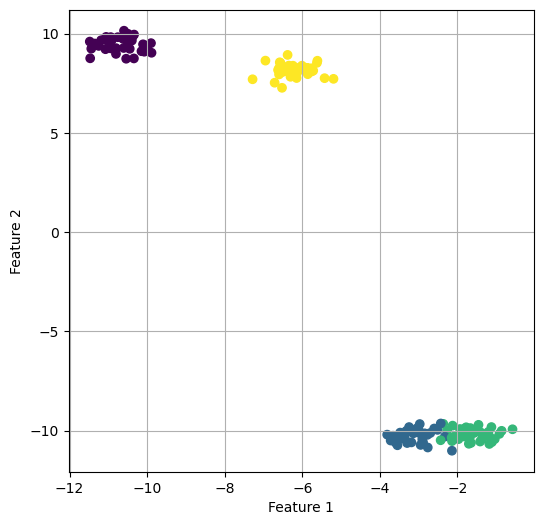

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X, Y = make_blobs(n_samples=150,
                       centers=4,
                       cluster_std=0.4,
                       center_box=(-15.0, 15.0))

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

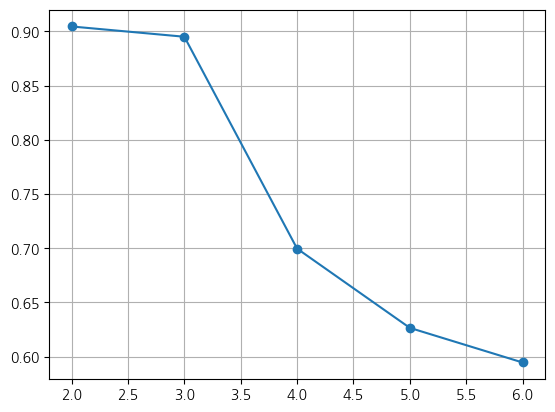

In [9]:
import koreanize_matplotlib
import warnings
warnings.filterwarnings("ignore")

box = []

# 시뮬레이션
for n in range(2, 7):  
    km = KMeans(n_clusters=n)      # 군집개수를 n개로
    labels = km.fit_predict(X)      # 군집을 잡아줌
    
    score = silhouette_score(X, labels)
    box.append(score)

plt.plot(range(2,7), box, marker = "o")
plt.grid()
plt.show()

# 실루엣 계수가 1에 가까울수록 가장 군집이 잘 잡힌 것

# 4여야되는데?...뭐지 모르겟음